In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import os
import pandas as pd

### Visualizing audio length 

In [2]:
import os

In [3]:
base_path = "/home/rishav/repo/ml/speaker-recognizer"
data_dir = os.path.join(base_path, "data/original")


In [22]:
def get_file_path_and_speaker(data_dir):
    speaker_name_and_ids = {}
    speaker_counter = 0
    file_path_and_speaker = {}
    for root, dirs, files in os.walk(data_dir):
        path = root.split(os.sep)
        for file in files:
            speaker, file_path = file.split("_")[0].lower(), os.path.join('/'.join(path), file)
            if speaker not in speaker_name_and_ids:
                speaker_counter += 1
                speaker_name_and_ids[speaker] = speaker_counter

            speaker_id = speaker_name_and_ids[speaker]
            file_path_and_speaker[file_path] = speaker_id

    speaker_df = pd.DataFrame.from_dict(file_path_and_speaker, orient='index')
    speaker_df['file_path'] = speaker_df.index
    speaker_df.reset_index(drop=True, inplace=True)
    speaker_df.rename(columns={0: 'speaker_id'}, inplace=True)

    return speaker_df, speaker_name_and_ids


speaker_df, speaker_name_and_ids = get_file_path_and_speaker(data_dir)

print(f'''No. of speakers in the dataset : {len(speaker_df['speaker_id'].unique())}''')

No. of speakers in the dataset : 104


In [4]:
file_arr, sr = librosa.load(sample_file)
file_arr, sr

(array([ 7.4473172e-07, -2.0618731e-06,  2.3822320e-05, ...,
        -1.1457860e-02, -1.1612729e-02,  0.0000000e+00], dtype=float32),
 22050)

In [25]:
librosa.get_duration(y=file_arr, sr=sr)

10.397868480725624

In [23]:
def get_audio_length(file_path):
    try :
        file_arr, sr = librosa.load(file_path)
        duration = librosa.get_duration(y=file_arr, sr=sr)
        print(f'{file_path} : {duration}')
        return duration
    except Exception as e:
        return 0

speaker_df['audio_length'] = speaker_df['file_path'].apply(lambda path : get_audio_length(path))

/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Nandini-011/Nandini_2.wav : 10.688027210884353
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Nandini-011/Nandini_5.wav : 10.965351473922903
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Nandini-011/Nandini_1.wav : 9.685351473922902
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Nandini-011/Nandini_4.wav : 10.453333333333333
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Nandini-011/Nandini_3.wav : 10.389342403628119
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AbhinandanBhatnagar-091/AbhinandanBhatnagar_3.wav : 9.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AbhinandanBhatnagar-091/AbhinandanBhatnagar_5.wav : 9.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AbhinandanBhatnagar-091/AbhinandanBhatnagar_1.wav : 9.0
/home/rishav/repo/ml/speaker-recognizer/data/original/

/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AshishPatel-067/AshishPatel_3.wav : 7.657868480725623
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/BhartiYadav-050/BhartiYadav_3.wav : 8.4
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/BhartiYadav-050/BhartiYadav_1.wav : 8.4
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/BhartiYadav-050/BhartiYadav_2.wav : 8.3
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/BhartiYadav-050/BhartiYadav_5.wav : 8.4
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/BhartiYadav-050/BhartiYadav_4.wav : 8.4
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/JyotiDa-010/JyotiDa_4.wav : 10.917868480725623
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/JyotiDa-010/JyotiDa_2.wav : 10.177868480725623
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/JyotiDa-010/JyotiDa_1.wav : 11.137868480

/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/VirendraGarg-093/VirendraGarg_1.wav : 11.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/VirendraGarg-093/VirendraGarg_2.wav : 11.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/VirendraGarg-093/VirendraGarg_5.wav : 11.7
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/VirendraGarg-093/VirendraGarg_4.wav : 11.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/VirendraGarg-093/VirendraGarg_3.wav : 11.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SrishtiBhatnagar-092/SrishtiBhatnagar_3.wav : 8.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SrishtiBhatnagar-092/SrishtiBhatnagar_2.wav : 8.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SrishtiBhatnagar-092/SrishtiBhatnagar_4.wav : 8.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SrishtiBhatnagar-092/Sr

/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/IrfanKhan-039/IrfanKhan_5.wav : 7.2
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/RachnaSharma-046/RachnaSharma_4.wav : 15.697868480725624
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/RachnaSharma-046/RachnaSharma_2.wav : 10.137868480725624
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/RachnaSharma-046/RachnaSharma_5.wav : 11.057868480725624
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/RachnaSharma-046/RachnaSharma_3.wav : 10.797868480725624
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/RachnaSharma-046/RachnaSharma_1.wav : 9.477868480725624
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/ShahrukhKhan-030/ShahrukhKhan_2.wav : 8.1
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/ShahrukhKhan-030/ShahrukhKhan_4.wav : 8.0
/home/rishav/repo/ml/speaker-recognizer/data/origina

/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AamirKhan-31/AamirKhan_1.wav : 9.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AamirKhan-31/AamirKhan_2.wav : 8.9
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/ApporvaBajpayee-057/ApporvaBajpayee_5.wav : 5.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/ApporvaBajpayee-057/ApporvaBajpayee_3.wav : 5.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/ApporvaBajpayee-057/ApporvaBajpayee_1.wav : 5.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/ApporvaBajpayee-057/ApporvaBajpayee_2.wav : 5.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/ApporvaBajpayee-057/ApporvaBajpayee_4.wav : 5.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Navndhi-024/Navnidhi_4.wav : 7.9
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Navndhi-024/Navnidhi_1.wav : 7.9
/home/rishav

/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/ShishirMishra-078/ShishirMishra_3.wav : 8.1
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Rupanshi-059/Rupanshi_4.wav : 8.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Rupanshi-059/Rupanshi_3.wav : 8.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Rupanshi-059/Rupanshi_1.wav : 8.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Rupanshi-059/Rupanshi_5.wav : 8.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Rupanshi-059/Rupanshi_2.wav : 8.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Vaibhav-005/Vaibhav_2.wav : 5.293514739229025
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Vaibhav-005/Vaibhav_1.wav : 6.293514739229025
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/Vaibhav-005/Vaibhav_4.wav : 5.893514739229025
/home/rishav/repo/ml/speaker-recogni

/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/PraveenChaturvedi-075/PraveenChaturvedi_1.wav : 7.9
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/PraveenChaturvedi-075/PraveenChaturvedi_2.wav : 7.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/PraveenChaturvedi-075/PraveenChaturvedi_5.wav : 7.8
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SunnyDeol-035/SunnyDeol_3.wav : 8.4
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SunnyDeol-035/SunnyDeol_4.wav : 7.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SunnyDeol-035/SunnyDeol_1.wav : 8.4
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SunnyDeol-035/SunnyDeol_2.wav : 8.3
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SunnyDeol-035/SunnyDeol_5.wav : 6.9
/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/SanjayDutt-038/SanjayDutt_1.wav : 8.2
/home/rishav/r

/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/JyotiShukla_6.wav : 15.497868480725623
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/IrfanKhan_6.wav : 7.1
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/AmitSingh_6.wav : 8.1
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/NikhilAnil_6.wav : 6.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/ApporvaBajpayee_6.wav : 5.1
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/SalmanKhan_6.wav : 8.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/LuvkushVerma_6.wav : 9.6
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/MohitChandani_6.wav : 8.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/PrayagMishra_6.wav : 8.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/AdityaBajpayee_6.wav : 8.0
/home/rishav/repo/ml/speaker-recognizer/data/original/TestingAudio/Anu

<AxesSubplot:xlabel='audio_length', ylabel='Count'>

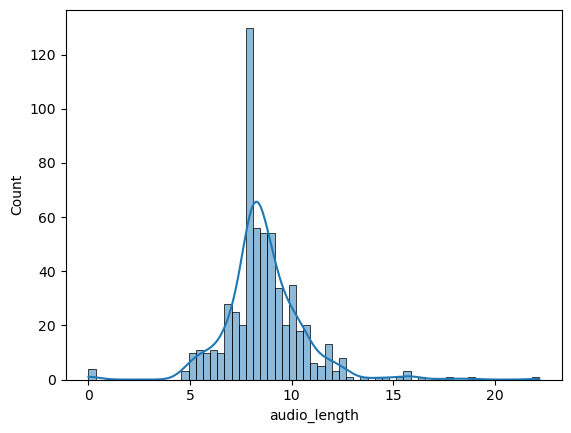

In [24]:
import seaborn as sns
sns.histplot(data=speaker_df, x="audio_length", kde=True)

<AxesSubplot:ylabel='Frequency'>

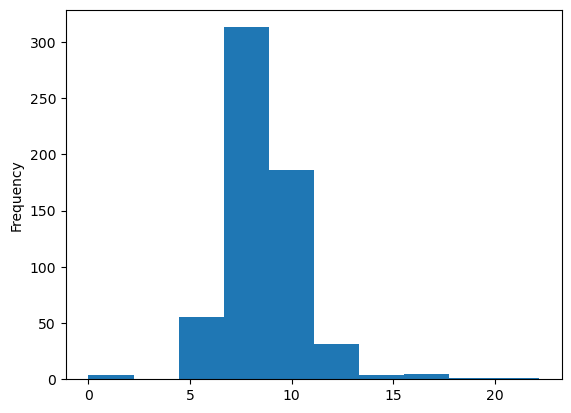

In [25]:
speaker_df['audio_length'].plot.hist()

In [26]:
speaker_df['audio_length'].describe()

count    600.000000
mean       8.626608
std        1.981413
min        0.000000
25%        7.907517
50%        8.400000
75%        9.400000
max       22.197868
Name: audio_length, dtype: float64

In [27]:
speaker_df_fil = speaker_df[speaker_df['audio_length'] != 0]

In [30]:
speaker_and_file_count = speaker_df_fil.groupby('speaker_id').agg({'file_path' : 'count'})
speaker_and_file_count = speaker_and_file_count.rename(columns={'file_path': 'file_count'}) 
speaker_and_file_count[speaker_and_file_count['file_count'] == 1]

,file_count
speaker_id,
23,1
102,1
103,1
104,1


In [32]:
speaker_and_file_count['speaker_id'] = speaker_and_file_count.index

In [33]:
speaker_and_file_count

,file_count,speaker_id
speaker_id,,
1,6,1
2,6,2
3,6,3
4,6,4
5,6,5
...,...,...
100,6,100
101,6,101
102,1,102


In [42]:
speaker_and_file_count[speaker_and_file_count['file_count'] == 1]

,file_count,speaker_id
speaker_id,,
23,1,23
102,1,102
103,1,103
104,1,104


In [43]:
speaker_df_fil.head()

,speaker_id,file_path,audio_length
0,1,/home/rishav/repo/ml/speaker-recognizer/data/o...,10.688027
1,1,/home/rishav/repo/ml/speaker-recognizer/data/o...,10.965351
2,1,/home/rishav/repo/ml/speaker-recognizer/data/o...,9.685351
3,1,/home/rishav/repo/ml/speaker-recognizer/data/o...,10.453333
4,1,/home/rishav/repo/ml/speaker-recognizer/data/o...,10.389342


In [47]:
speaker_df_fil = speaker_df_fil[~speaker_df_fil['speaker_id'].isin([23, 102, 103, 104])]

In [37]:
file_count_and_speaker_count =  speaker_and_file_count.groupby('file_count').agg({'speaker_id' : 'count'})
file_count_and_speaker_count = file_count_and_speaker_count.rename(columns={'speaker_id': 'speaker_count'}) 
file_count_and_speaker_count

,speaker_count
file_count,
1,4
2,1
4,1
5,2
6,96


<AxesSubplot:xlabel='file_count'>

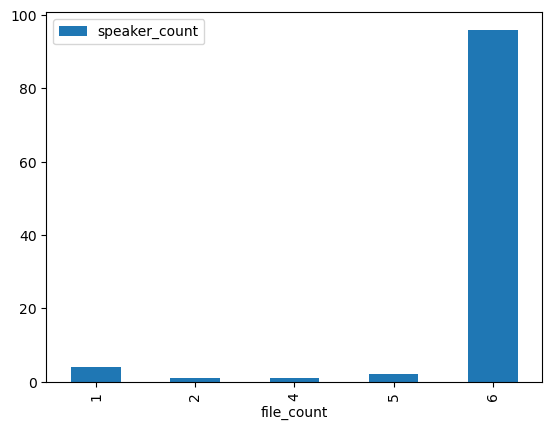

In [39]:
import seaborn as sns
file_count_and_speaker_count.plot.bar()

In [41]:
len(speaker_df_fil['speaker_id'].unique())

104

In [48]:
len(speaker_df_fil['speaker_id'].unique())

100

In [49]:
speaker_df_fil.shape

(592, 3)

<AxesSubplot:ylabel='Frequency'>

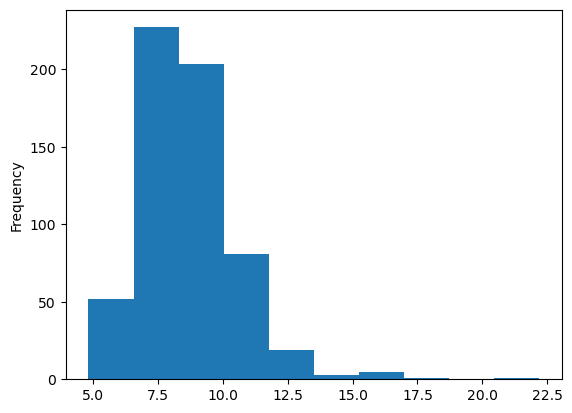

In [50]:
speaker_df_fil['audio_length'].plot.hist()

In [52]:
pd.DataFrame(speaker_df_fil['audio_length'].describe())

,audio_length
count,592.000000
mean,8.673897
std,1.813898
min,4.817868
25%,8.000000
50%,8.400000
75%,9.400000
max,22.197868


<AxesSubplot:xlabel='file_count'>

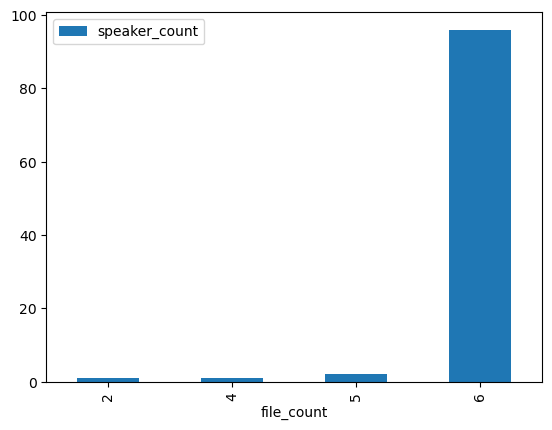

In [57]:
file_count_and_speaker_count_fil =  file_count_and_speaker_count[file_count_and_speaker_count.index != 1]
file_count_and_speaker_count_fil.plot.bar()

In [60]:
pd.DataFrame(file_count_and_speaker_count_fil['speaker_count'].describe())

,speaker_count
count,4.000000
mean,25.000000
std,47.335681
min,1.000000
25%,1.000000
50%,1.500000
75%,25.500000
max,96.000000


In [61]:
file_count_and_speaker_count_fil

,speaker_count
file_count,
2,1
4,1
5,2
6,96


## Visualizing sound

In [63]:
male_1_audio_file_path = "/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AkshayKumar-028/AkshayKumar_1.wav"

In [74]:
def plot_sound(file_path, title):
    file_arr, sr = librosa.load(file_path)
    plt.figure(figsize=(15, 17))

    plt.subplot(3, 1, 1)
    librosa.display.waveshow(file_arr, alpha=0.5)
    plt.ylim((-1, 1))
    plt.ylabel("Amplitude")
    plt.title(title)

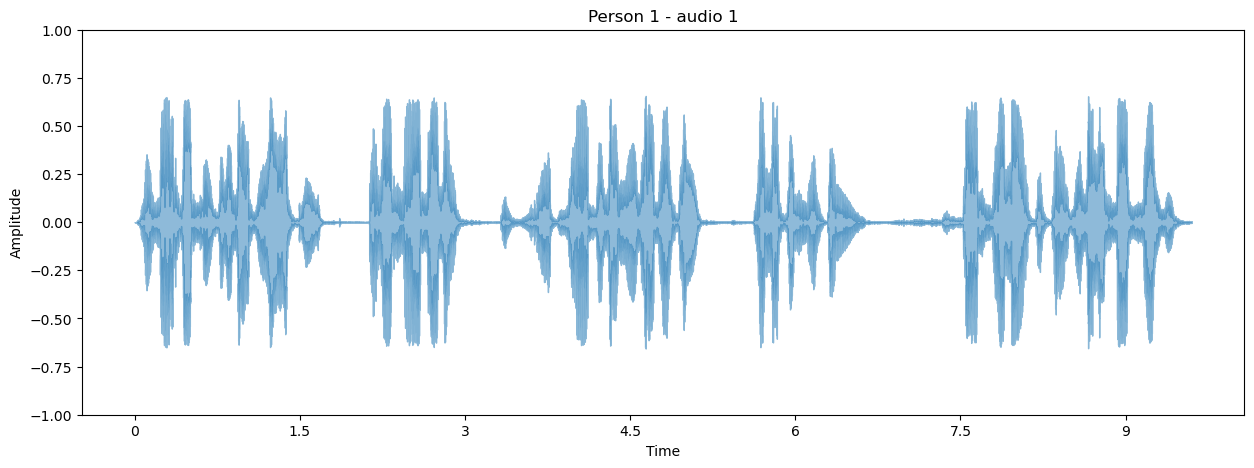

In [79]:
plot_sound(male_1_audio_file_path, "Person 1 - audio 1")

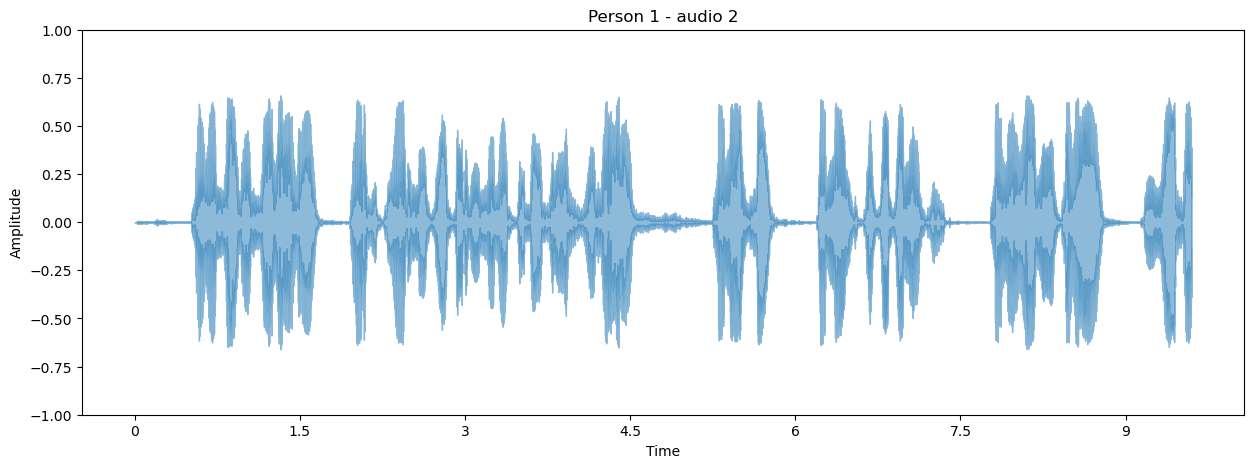

In [80]:
plot_sound("/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AkshayKumar-028/AkshayKumar_2.wav", "Person 1 - audio 2")

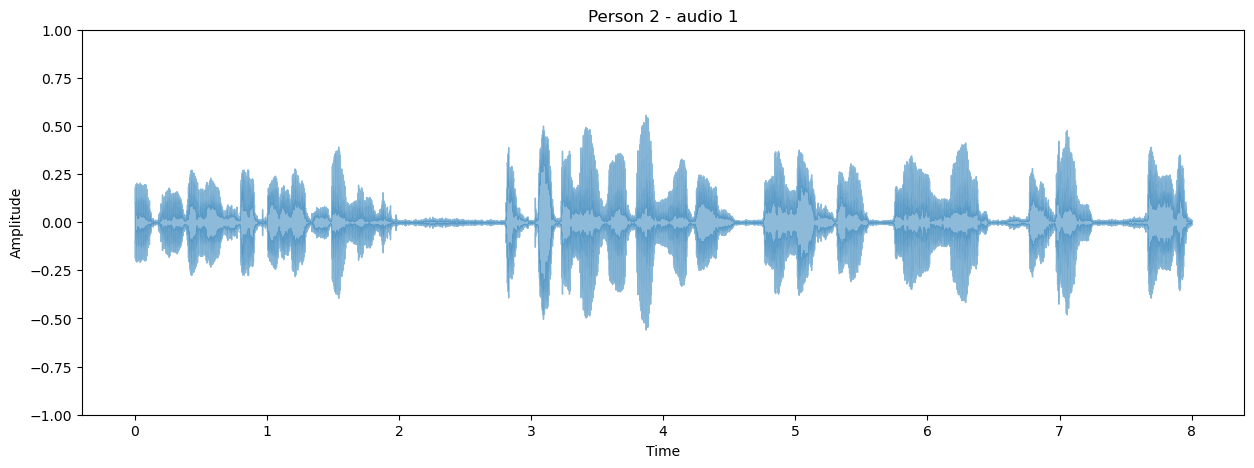

In [83]:
plot_sound("/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/DebomitraDas-088/DebomitraDas_1.wav", "Person 2 - audio 1")

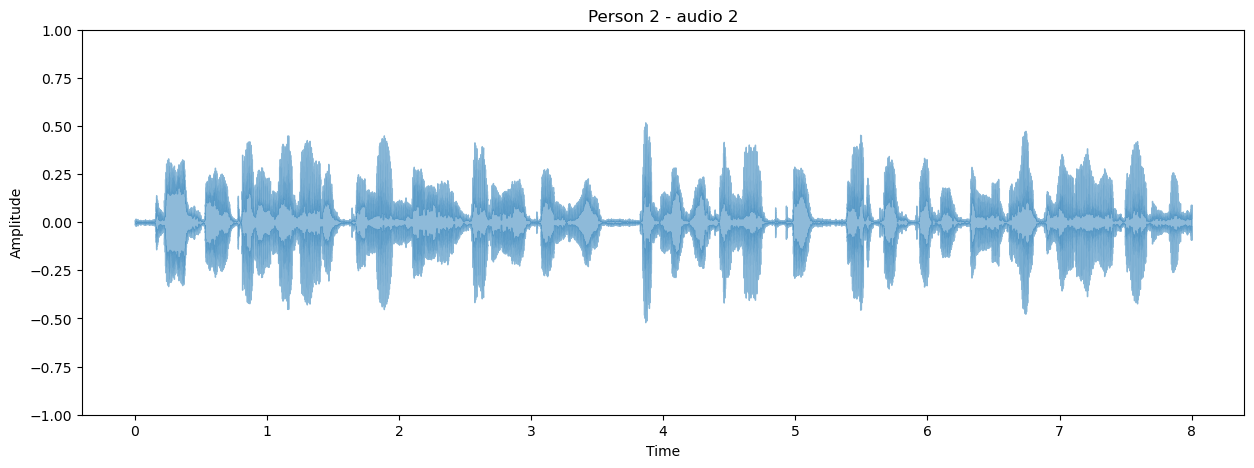

In [84]:
plot_sound("/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/DebomitraDas-088/DebomitraDas_2.wav", "Person 2 - audio 2")

## Visualizing MFCC 

In [121]:
def plot_mfcc(file_path, title):
    signal, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

    plt.figure(figsize=(25, 10))
    librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)

    plt.colorbar(format="%+2.f")
    plt.title(title)
    plt.ylabel("MFCC coefficients")
    plt.show()

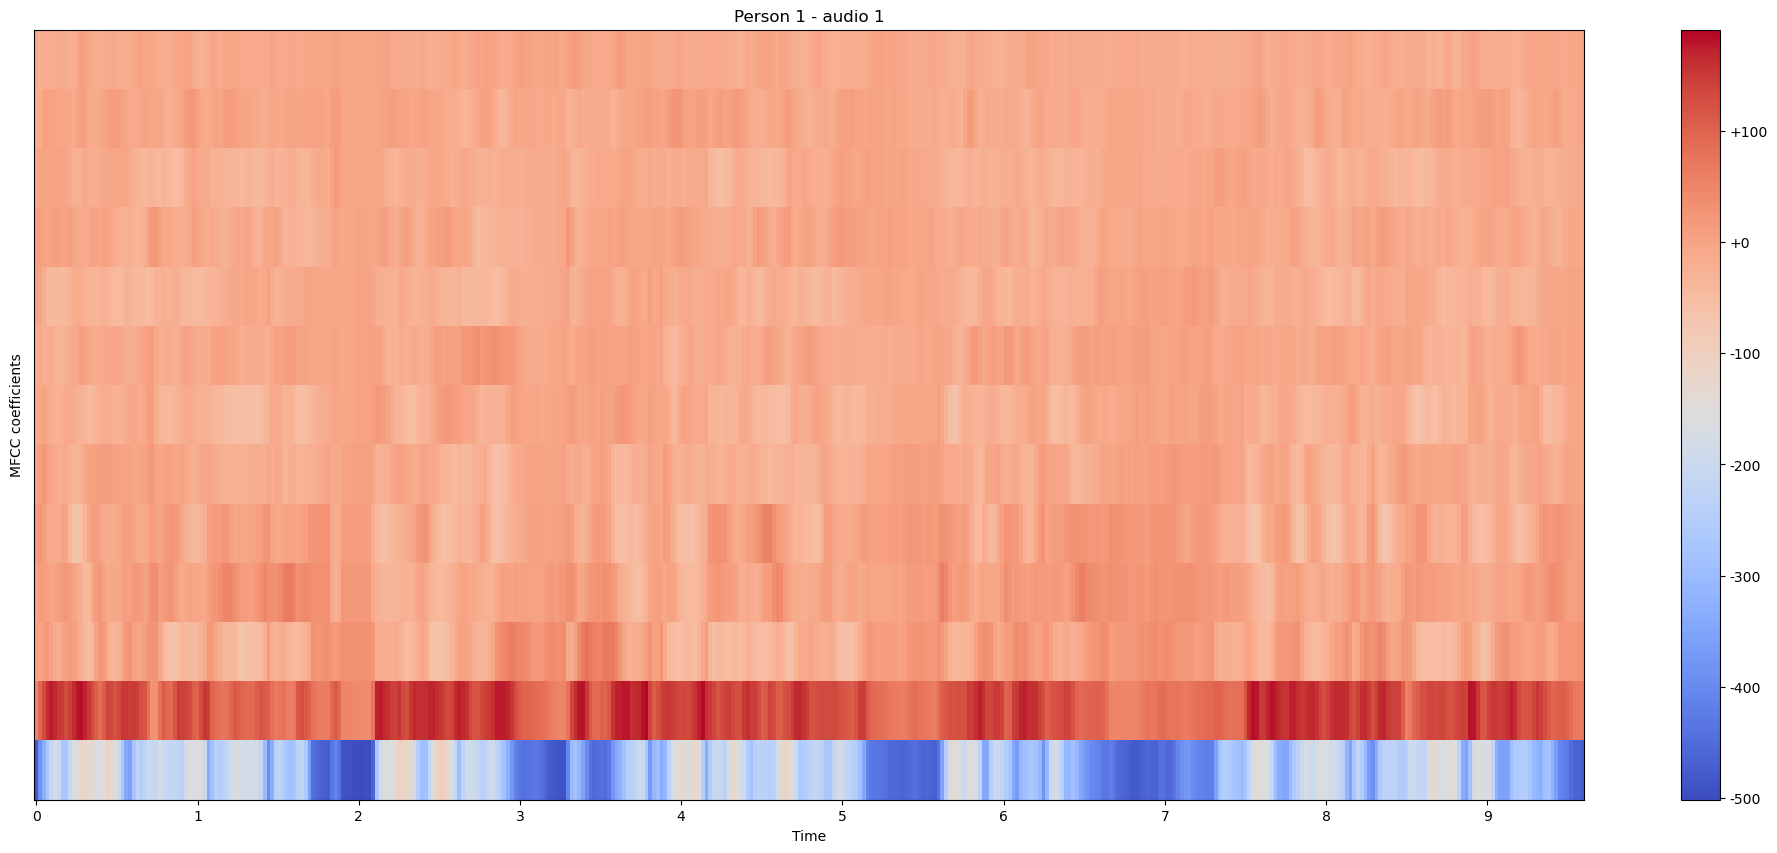

In [123]:
plot_mfcc("/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AkshayKumar-028/AkshayKumar_1.wav", "Person 1 - audio 1")

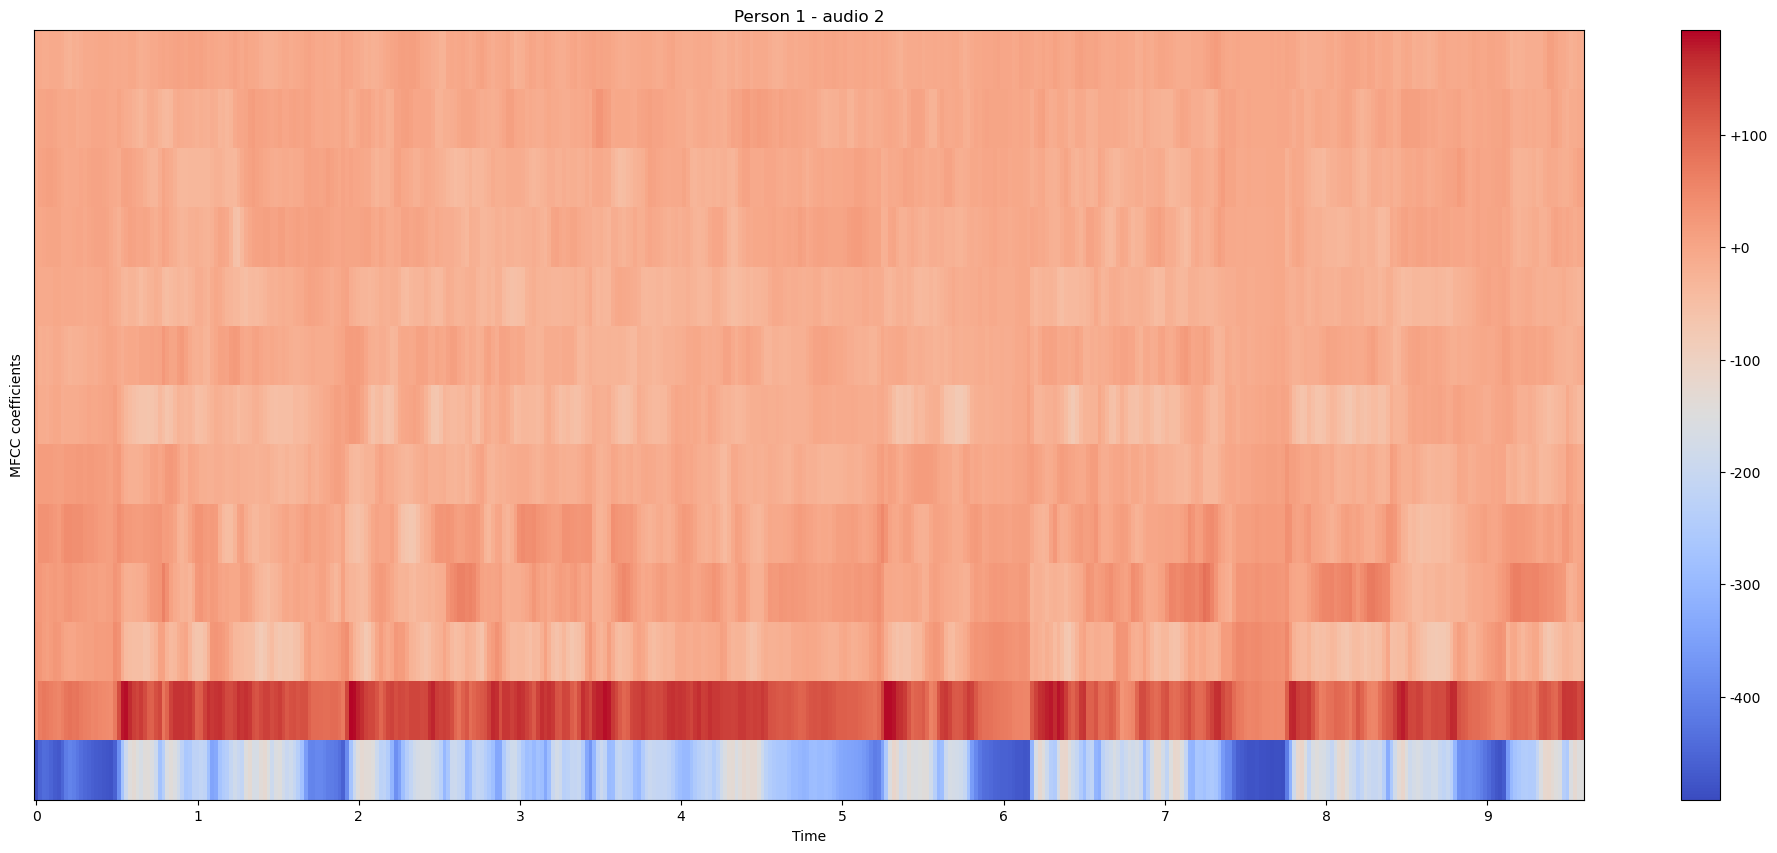

In [126]:
plot_mfcc("/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/AkshayKumar-028/AkshayKumar_2.wav", "Person 1 - audio 2")

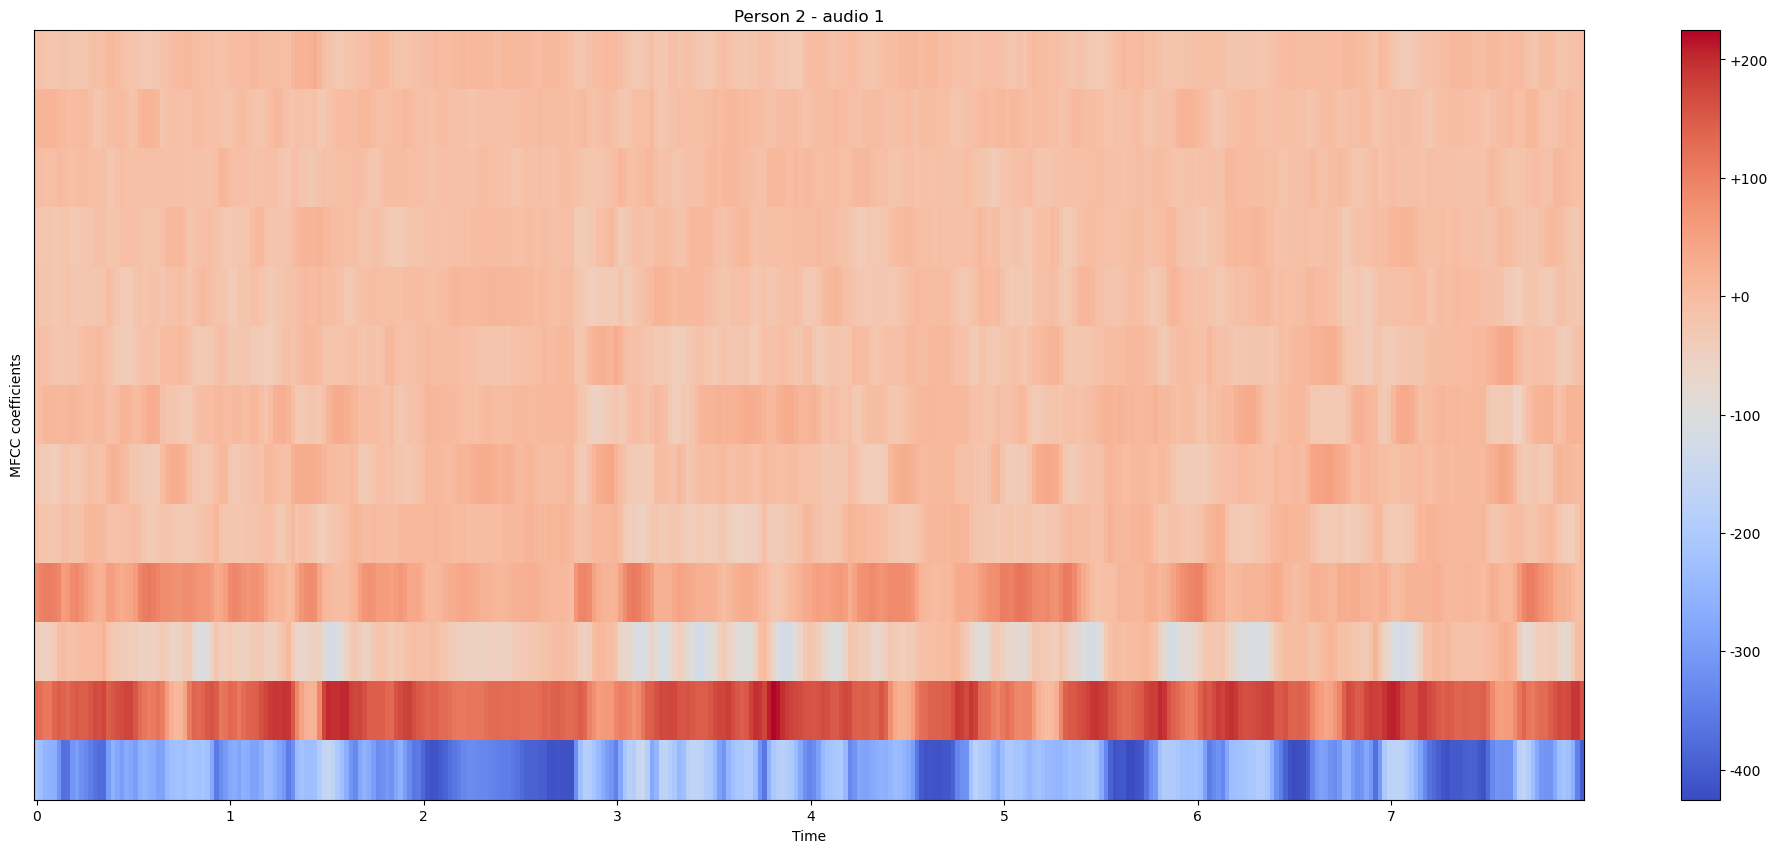

In [124]:
plot_mfcc('/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/DebomitraDas-088/DebomitraDas_1.wav',\
         'Person 2 - audio 1')

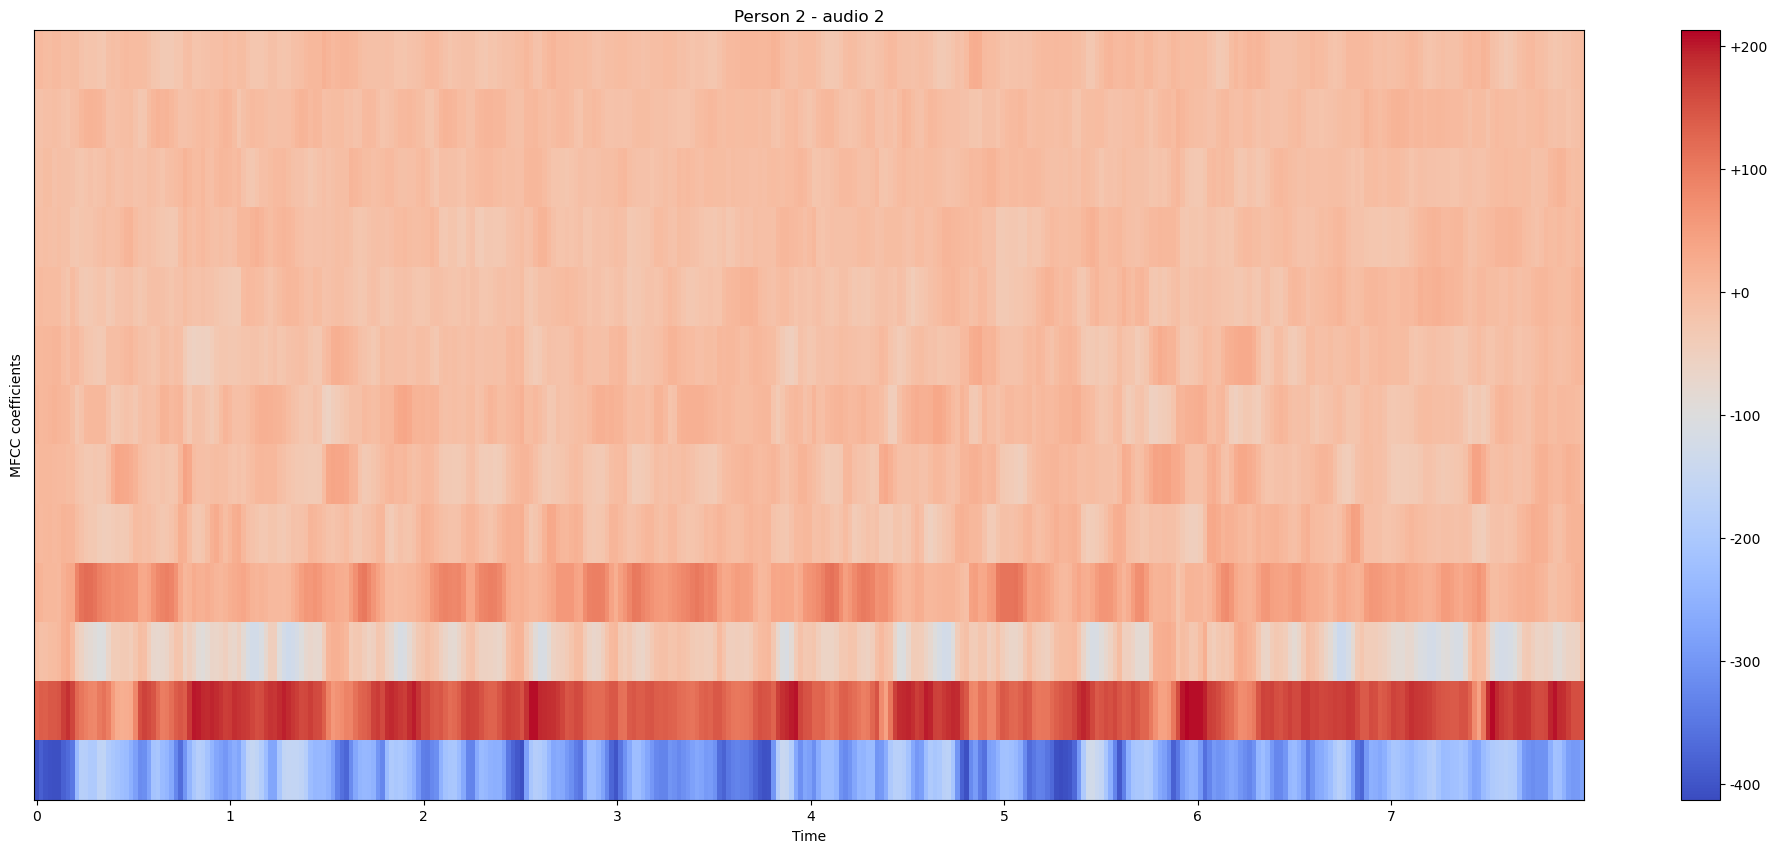

In [125]:
plot_mfcc('/home/rishav/repo/ml/speaker-recognizer/data/original/TrainingAudio/DebomitraDas-088/DebomitraDas_2.wav',\
         'Person 2 - audio 2')